In [1]:
import sys
print(sys.executable)


c:\Users\KIIT0001\qml_env\Scripts\python.exe


In [2]:
#importing the libraries

import pandas as pd
import numpy as np
import time 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_algorithms.optimizers import COBYLA

In [3]:
# reading data
df = pd.read_csv("DataCoSupplyChainDataset.csv", encoding="latin1")
print(df.shape)
df.head()

(180519, 53)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
# collection of data

features = [
    "Days for shipping (real)",
    "Days for shipment (scheduled)",
    "Benefit per order",
    "Sales per customer",
    "Product Price"
]

X = df[features].values          
y = df["Late_delivery_risk"].values

In [5]:
# Data Preprocessing

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X_scaled)


In [6]:
#configuration training features

from sklearn.metrics import accuracy_score

configs = [
    {"size": 4000, "reps": 1, "rot": ['ry']},
    {"size": 4000, "reps": 2, "rot": ['ry']},
    {"size": 4000, "reps": 2, "rot": ['ry','rz']},
    {"size": 18000, "reps": 1, "rot": ['ry']},
    {"size": 18000, "reps": 2, "rot": ['ry']},
    {"size": 18000, "reps": 2, "rot": ['ry','rz']}
]

results = []
times = []
labels = []


In [7]:
#Training of model

np.random.seed(42)
for cfg in configs:
    print("\nRunning:", cfg)

    idx = np.random.choice(len(X_reduced), cfg["size"], replace=False)

    X_sub = X_reduced[idx]
    y_sub = y[idx]

    X_train, X_test, y_train, y_test = train_test_split(
        X_sub, y_sub, test_size=0.2, random_state=42
    )

    feature_map = ZZFeatureMap(feature_dimension=5, reps=1)

    ansatz = TwoLocal(
        num_qubits=5,
        rotation_blocks=cfg["rot"],
        entanglement_blocks='cz',
        reps=cfg["reps"]
    )

    optimizer = COBYLA(maxiter=10)

    vqc = VQC(feature_map=feature_map, ansatz=ansatz, optimizer=optimizer)

    start = time.time()
    vqc.fit(X_train, y_train)
    train_time = time.time() - start


    y_pred = vqc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print("Accuracy:", acc)

    results.append(acc)
    times.append(train_time)
    labels.append(f'{cfg["size"]}-r{cfg["reps"]}-{"".join(cfg["rot"])}')

    


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_4120\3236633918.py:16: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(feature_dimension=5, reps=1)
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_4120\3236633918.py:18: DeprecationWarning: The class ``qiskit.circuit.library.n_local.two_local.TwoLocal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.n_local instead.
  ansatz = TwoLocal(
No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.



Running: {'size': 4000, 'reps': 1, 'rot': ['ry']}


c:\Users\KIIT0001\qml_env\Lib\site-packages\scipy\_lib\pyprima\common\preproc.py:68: UserWarning: COBYLA: Invalid MAXFUN; it should be at least num_vars + 2; it is set to 12
  warn(f'{solver}: Invalid MAXFUN; it should be at least {min_maxfun_str}; it is set to {maxfun}')
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_4120\3236633918.py:16: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(feature_dimension=5, reps=1)
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_4120\3236633918.py:18: DeprecationWarning: The class ``qiskit.circuit.library.n_local.two_local.TwoLocal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.n_local instead.
  ansatz = Tw

Accuracy: 0.505

Running: {'size': 4000, 'reps': 2, 'rot': ['ry']}


c:\Users\KIIT0001\qml_env\Lib\site-packages\scipy\_lib\pyprima\common\preproc.py:68: UserWarning: COBYLA: Invalid MAXFUN; it should be at least num_vars + 2; it is set to 17
  warn(f'{solver}: Invalid MAXFUN; it should be at least {min_maxfun_str}; it is set to {maxfun}')
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_4120\3236633918.py:16: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(feature_dimension=5, reps=1)
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_4120\3236633918.py:18: DeprecationWarning: The class ``qiskit.circuit.library.n_local.two_local.TwoLocal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.n_local instead.
  ansatz = Tw

Accuracy: 0.5725

Running: {'size': 4000, 'reps': 2, 'rot': ['ry', 'rz']}


c:\Users\KIIT0001\qml_env\Lib\site-packages\scipy\_lib\pyprima\common\preproc.py:68: UserWarning: COBYLA: Invalid MAXFUN; it should be at least num_vars + 2; it is set to 32
  warn(f'{solver}: Invalid MAXFUN; it should be at least {min_maxfun_str}; it is set to {maxfun}')
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_4120\3236633918.py:16: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(feature_dimension=5, reps=1)
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_4120\3236633918.py:18: DeprecationWarning: The class ``qiskit.circuit.library.n_local.two_local.TwoLocal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.n_local instead.
  ansatz = Tw

Accuracy: 0.5575

Running: {'size': 18000, 'reps': 1, 'rot': ['ry']}


c:\Users\KIIT0001\qml_env\Lib\site-packages\scipy\_lib\pyprima\common\preproc.py:68: UserWarning: COBYLA: Invalid MAXFUN; it should be at least num_vars + 2; it is set to 12
  warn(f'{solver}: Invalid MAXFUN; it should be at least {min_maxfun_str}; it is set to {maxfun}')
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_4120\3236633918.py:16: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(feature_dimension=5, reps=1)
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_4120\3236633918.py:18: DeprecationWarning: The class ``qiskit.circuit.library.n_local.two_local.TwoLocal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.n_local instead.
  ansatz = Tw

Accuracy: 0.5247222222222222

Running: {'size': 18000, 'reps': 2, 'rot': ['ry']}


c:\Users\KIIT0001\qml_env\Lib\site-packages\scipy\_lib\pyprima\common\preproc.py:68: UserWarning: COBYLA: Invalid MAXFUN; it should be at least num_vars + 2; it is set to 17
  warn(f'{solver}: Invalid MAXFUN; it should be at least {min_maxfun_str}; it is set to {maxfun}')
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_4120\3236633918.py:16: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(feature_dimension=5, reps=1)
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_4120\3236633918.py:18: DeprecationWarning: The class ``qiskit.circuit.library.n_local.two_local.TwoLocal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.n_local instead.
  ansatz = Tw

Accuracy: 0.52

Running: {'size': 18000, 'reps': 2, 'rot': ['ry', 'rz']}


c:\Users\KIIT0001\qml_env\Lib\site-packages\scipy\_lib\pyprima\common\preproc.py:68: UserWarning: COBYLA: Invalid MAXFUN; it should be at least num_vars + 2; it is set to 32
  warn(f'{solver}: Invalid MAXFUN; it should be at least {min_maxfun_str}; it is set to {maxfun}')


Accuracy: 0.5308333333333334


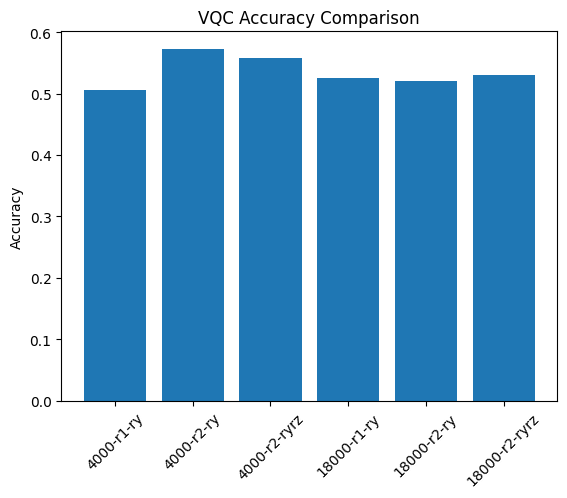

In [8]:
# visual representation of accuracy comparsion

results = results[:len(labels)]
plt.figure()
plt.bar(labels, results)
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("VQC Accuracy Comparison")
plt.show()

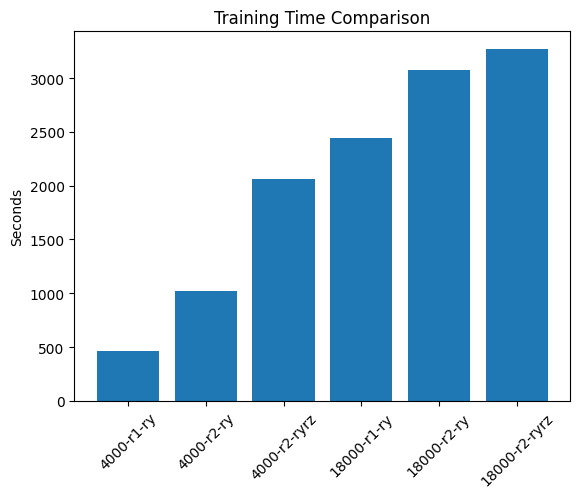

In [9]:
# visual representaion of training time comparison
plt.figure()
plt.bar(labels, times)
plt.xticks(rotation=45)
plt.ylabel("Seconds")
plt.title("Training Time Comparison")
plt.show()